## Group M


In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#### Our data:
The dataset deals with the use of resources for each country
like life expectancy, income per person, internet browsing, morbidity and more. 
[link to the data source](https://www.kaggle.com/sansuthi/gapminder-dataset)

In [135]:
ural = 'https://raw.githubusercontent.com/Eliyasmangisto/Datascience2021B/main/gapminder_data.csv'
df= pd.read_csv(ural)
df.tail()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
208,Vietnam,722.807559,3.91,1.085367,16.2,1.425435e+09,67.599998,0.4,27.851822,75.181,NaN,-7.0,302.725655,11.653322,71.000000,27.84
209,West Bank and Gaza,NaN,NaN,5.936085,NaN,1.424133e+07,11.300000,NaN,36.422772,72.832,NaN,NaN,NaN,NaN,32.000000,71.90
210,"Yemen, Rep.",610.357367,0.20,2.316235,35.1,2.348647e+08,20.299999,NaN,12.349750,65.493,NaN,-2.0,130.057831,6.265789,39.000000,30.64
211,Zambia,432.226337,3.56,0.341335,13.0,1.320257e+08,53.500000,13.5,10.124986,49.025,NaN,7.0,168.623030,12.019036,61.000000,35.42
212,Zimbabwe,320.771890,4.96,1.032785,19.0,5.902197e+08,58.099998,14.3,11.500415,51.384,NaN,1.0,297.883200,13.905267,66.800003,37.34


#### Understanding the data:

#### Fixing data types
Check if any of the data types need to be fixed:

In [136]:
df.dtypes

country                  object
incomeperperson         float64
alcconsumption          float64
armedforcesrate         float64
breastcancerper100th    float64
co2emissions            float64
femaleemployrate        float64
hivrate                 float64
internetuserate         float64
lifeexpectancy          float64
oilperperson            float64
polityscore             float64
relectricperperson      float64
suicideper100th         float64
employrate              float64
urbanrate               float64
dtype: object

#### Treat missing values

Check if there are missing values:

In [137]:
df.isnull().sum().sort_values(ascending=False)

oilperperson            150
relectricperperson       77
hivrate                  66
polityscore              52
armedforcesrate          49
breastcancerper100th     40
employrate               35
femaleemployrate         35
alcconsumption           26
incomeperperson          23
suicideper100th          22
lifeexpectancy           22
internetuserate          21
co2emissions             14
urbanrate                10
country                   0
dtype: int64

In [138]:
df = df.dropna().reset_index(drop=True).copy()
df.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Algeria,2231.993335,0.69,2.306817,23.5,2.932109e+09,31.700001,0.1,12.500073,73.131,0.420095,2.0,590.509814,4.848770,50.500000,65.22
1,Argentina,10749.419240,9.35,0.560987,73.9,5.872119e+09,45.900002,0.5,36.000335,75.901,0.635944,8.0,768.428300,7.765584,58.400002,92.00
2,Australia,25249.986060,10.21,0.486280,83.2,1.297009e+10,54.599998,0.1,75.895654,81.907,1.913026,10.0,2825.391095,8.470030,61.500000,88.74
3,Austria,26692.984110,12.40,0.815580,70.5,4.466084e+09,49.700001,0.3,72.731576,80.854,1.548791,10.0,2068.123309,13.094370,57.099998,67.16
4,Azerbaijan,2344.896916,13.34,1.976746,31.5,5.111077e+08,56.200001,0.1,46.679702,70.739,0.359173,-7.0,921.562111,1.380965,60.900002,51.92


#### Boxplot for the data :


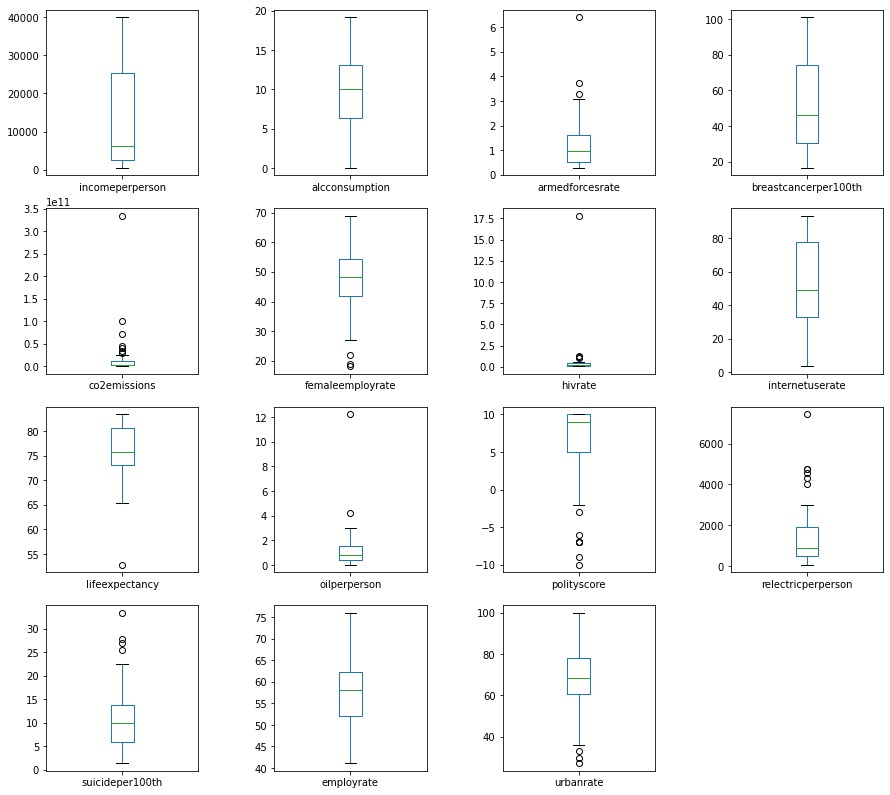

In [139]:
df.plot(subplots=True, layout=(4,4), kind='box', figsize=(15,14))
plt.subplots_adjust(wspace=0.5);

#### We chose to focus on this boxplots :

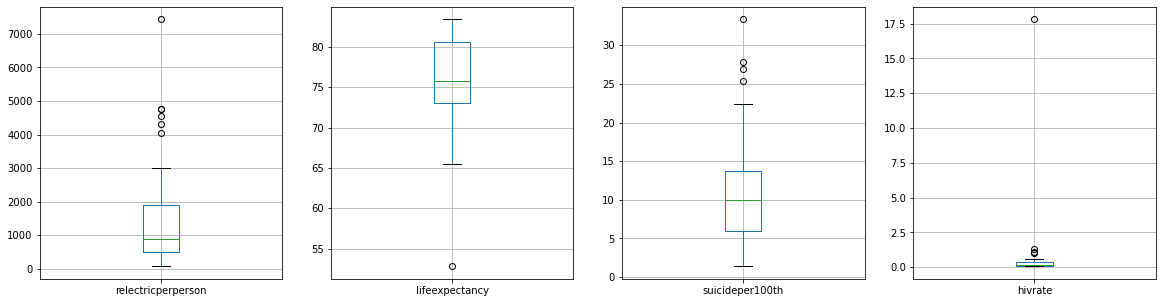

In [140]:
fig, axes = plt.subplots(figsize=(20, 5), ncols=4)
df.boxplot(ax=axes[0],column="relectricperperson")
df.boxplot(ax=axes[1],column="lifeexpectancy")
df.boxplot(ax=axes[2],column="suicideper100th")
df.boxplot(ax=axes[3],column="hivrate");

#### Who are these countries?

In [141]:
df.loc[(df['relectricperperson']> 7000)]

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
35,Norway,39972.35277,8.35,0.720528,74.8,1.962704e+09,60.900002,0.1,93.277508,81.097,2.191226,10.0,7432.130852,10.823,65.0,77.48


In [142]:
df.loc[(df['lifeexpectancy']< 55)]

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
46,South Africa,3745.649852,10.16,0.331863,35.0,1.460985e+10,34.299999,17.8,12.334893,52.797,0.504659,9.0,920.1376,15.714571,41.099998,60.74


In [143]:
df.loc[(df['suicideper100th']> 30)]

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
30,Lithuania,5332.238591,16.3,1.487831,38.5,226255333.3,48.799999,0.1,62.8119,72.231,0.812369,10.0,758.858719,33.34186,53.099998,66.96


In [144]:
df.loc[(df['hivrate']> 17)]

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
46,South Africa,3745.649852,10.16,0.331863,35.0,1.460985e+10,34.299999,17.8,12.334893,52.797,0.504659,9.0,920.1376,15.714571,41.099998,60.74


>
> You can see that South Africa is the country with the lowest lifeexpectancy and the highest morbidity in hiv.
>
>We will check later if there is a connection.

#### Data on the level of state policy. Minimum score -10 and maximum score 10.

In [145]:
df['polityscore'].value_counts()

 10.0    24
 8.0      7
 9.0      6
-7.0      4
 7.0      3
 5.0      3
 4.0      2
-9.0      1
-2.0      1
-10.0     1
 6.0      1
-6.0      1
-3.0      1
 2.0      1
Name: polityscore, dtype: int64

>It can be seen that most countries have a score 10. But there are many countries with a score below 0.

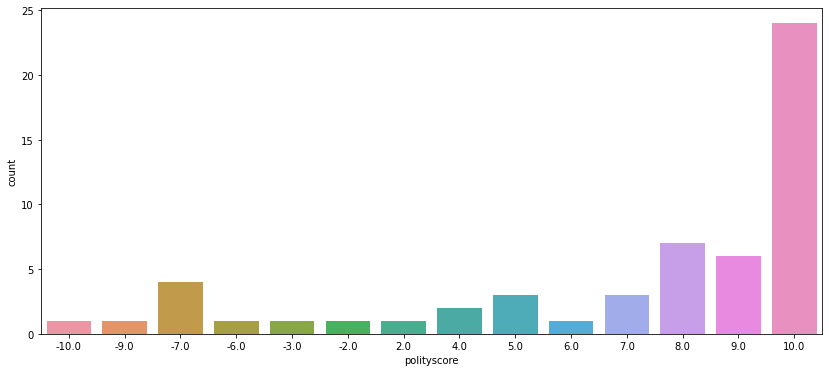

In [146]:
plt.figure(figsize=(14,6)) 
sns.countplot(x="polityscore", data=df);

#### Distribution of data:

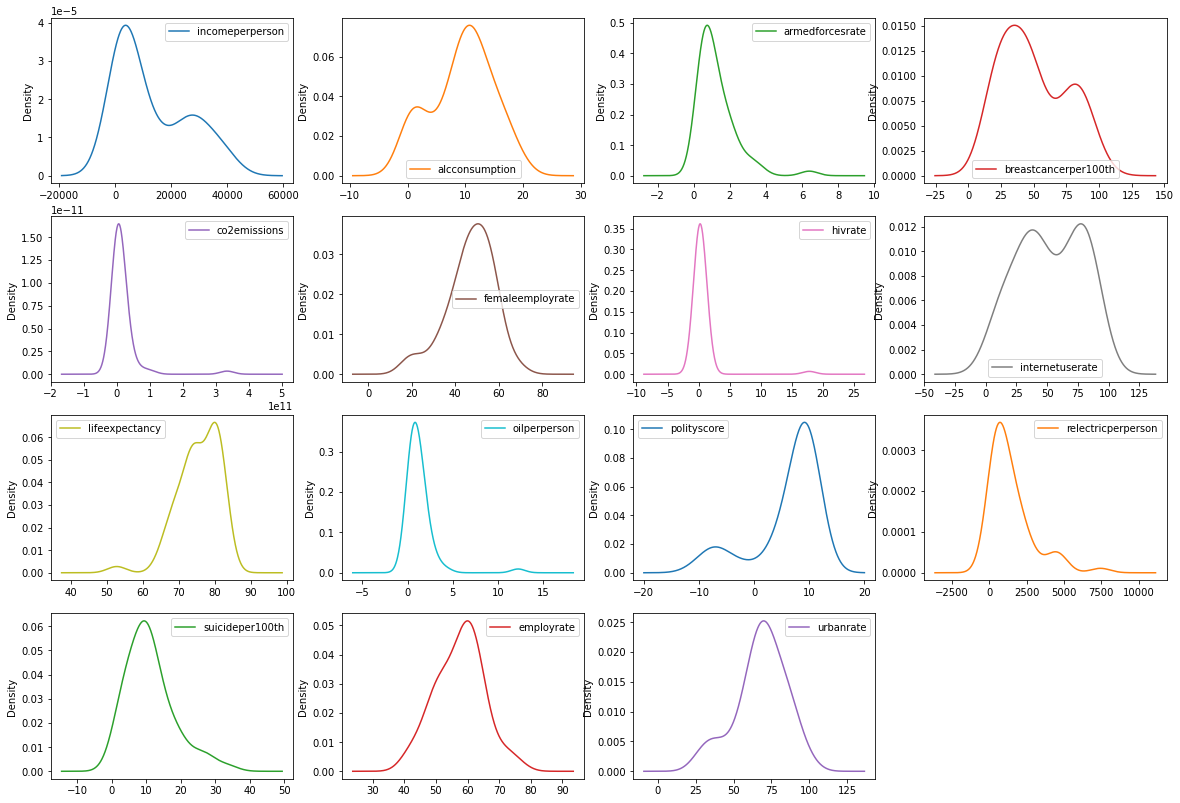

In [147]:
df.plot.density(subplots=True, sharex=False, sharey=False, layout=(4, 4), figsize=(20,14));

>It can be seen that most of the data are not close to a normal distribution.

#### Sample from each continent
We chose to look at one country from each continent and check connection between incomeperperson,alcconsumption and suicideper100th.

In [148]:
countries = df.loc[(df.country == "Australia") | (df.country == "South Africa")| (df.country == "China") | (df.country == "United States") | (df.country == "France")]
my_df = countries[['country','incomeperperson','alcconsumption',"suicideper100th"]]
my_df

,country,incomeperperson,alcconsumption,suicideper100th
2,Australia,25249.986060,10.21,8.470030
11,China,2425.471293,5.56,16.913248
18,France,22878.466570,12.48,14.091530
46,South Africa,3745.649852,10.16,15.714571
54,United States,37491.179520,9.70,9.927033


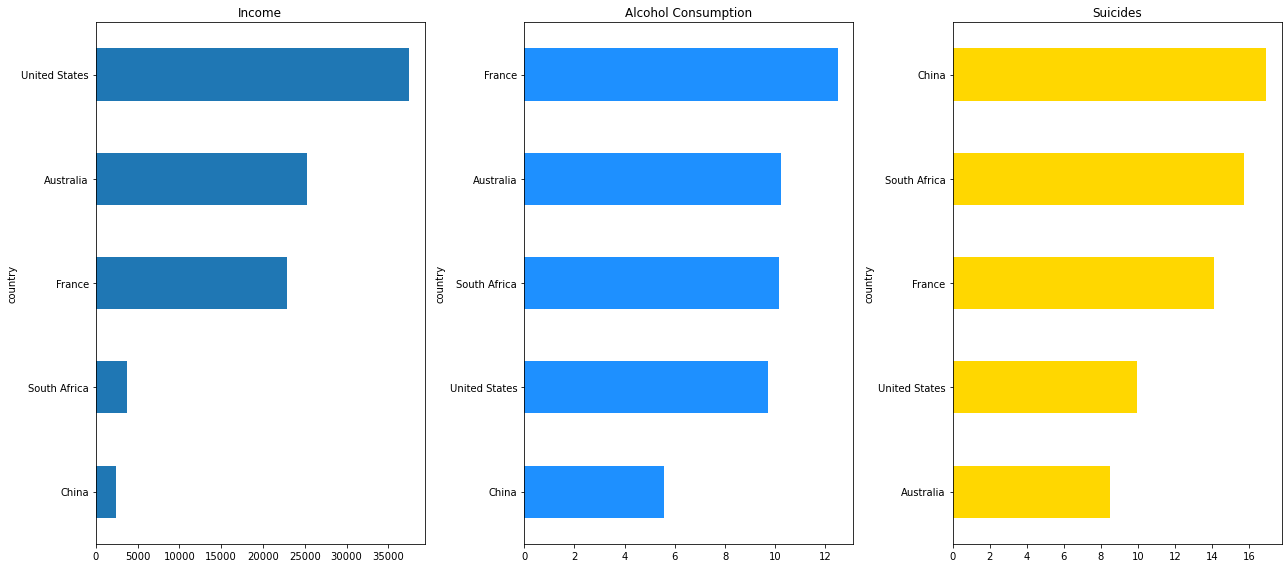

In [149]:
fig, axes = plt.subplots(figsize=(18, 8), ncols=3)
my_df["incomeperperson"].groupby(my_df["country"]).max().sort_values(ascending=True).plot.barh(ax=axes[0],title="Income",align='center')
my_df["alcconsumption"].groupby(my_df["country"]).max().sort_values(ascending=True).plot.barh(ax=axes[1],title="Alcohol Consumption",color="dodgerblue")
my_df["suicideper100th"].groupby(my_df["country"]).max().sort_values(ascending=True).plot.barh(ax=axes[2],title="Suicides",color="gold")
plt.tight_layout()
plt.show()

> As we can see China is at the bottom of the graph in terms of income and at the same time has the highest number of suicides
>
>One might think that there may be a connection between these data
>
>We would like to continue to examine the relationship between this data

### Correlations:
#### Correlations between the data:

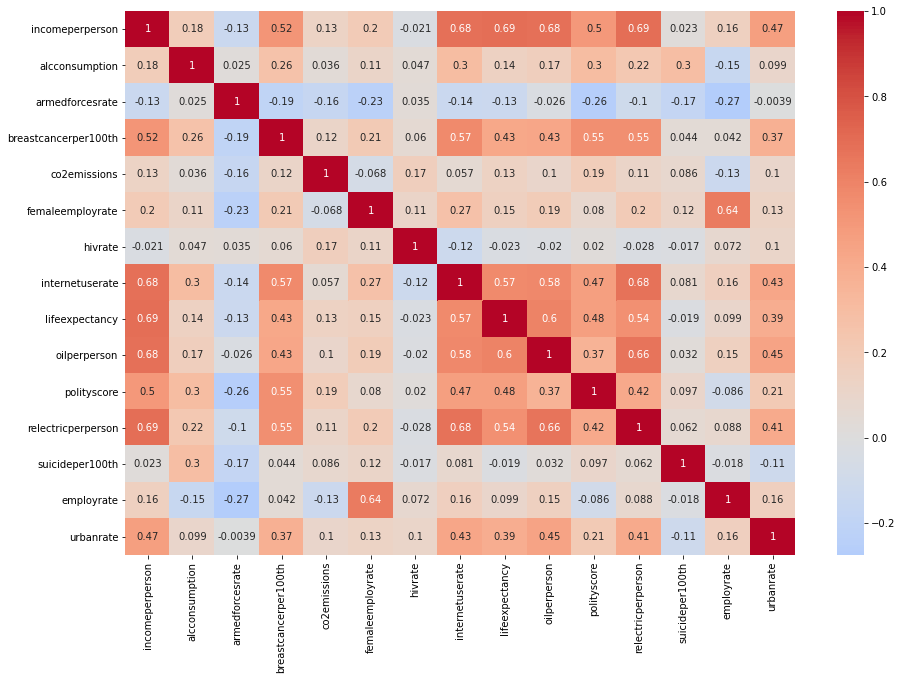

In [150]:
corrs=df.corr(method='kendall')
plt.figure(figsize=(15,10))
sns.heatmap(corrs,cmap='coolwarm',center=0, annot= True);

#### High correlations :

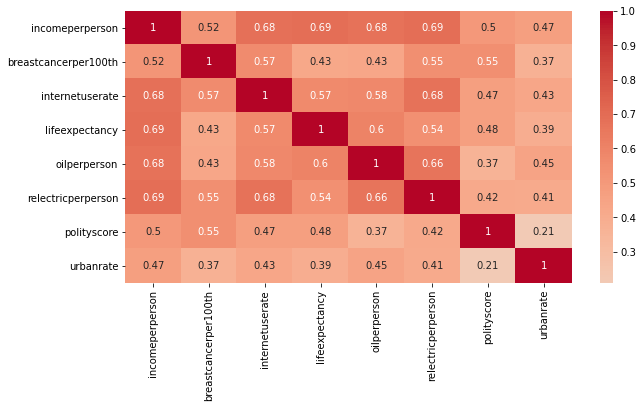

In [151]:
hige_corrs=df.loc[:,['incomeperperson','breastcancerper100th','internetuserate','lifeexpectancy','oilperperson','relectricperperson','polityscore','urbanrate']]
corrs=hige_corrs.corr(method='kendall')
plt.figure(figsize=(10,5))
sns.heatmap(corrs,cmap='coolwarm',center=0, annot= True);

#### Correlations between internetuserate to breastcancerper100th and lifeexpectancy. Does the Internet have an impact?

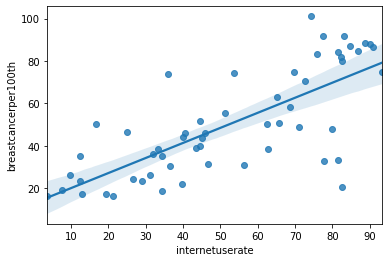

In [152]:
sns.regplot(x='internetuserate',y='breastcancerper100th',data=hige_corrs);

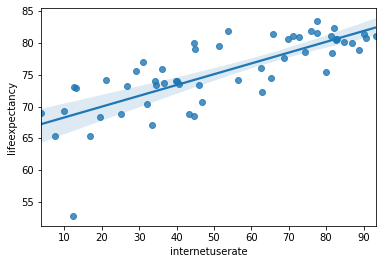

In [153]:
sns.regplot(x='internetuserate',y='lifeexpectancy',data=hige_corrs);

### Obeservation: 
>
> The corrolation between internetuserate and breastcancerper100th is quite high.
>
> The corrolation between internetuserate and lifeexpectancy is also quite high.
>
> The internet has two opposite effects on the one hand it causes an increase in cases of breast cancer and on the other hand causes life expectancy to rise.

#### Low correlations :

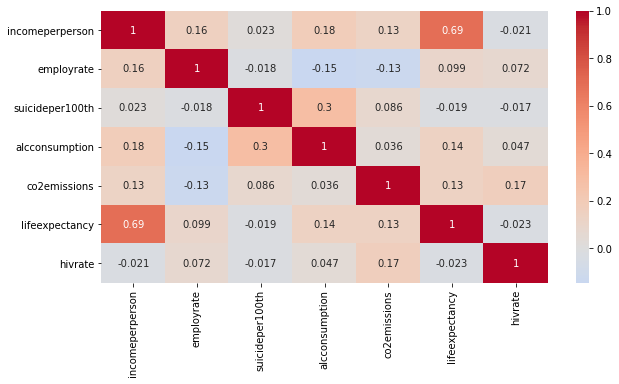

In [154]:
low_corrs = df[["incomeperperson","employrate","suicideper100th","alcconsumption","co2emissions","lifeexpectancy","hivrate"]]
corrs = low_corrs.corr(method='kendall')
plt.figure(figsize=(10,5))
sns.heatmap(corrs, cmap='coolwarm', center=0, annot= True);

### Obeservation: 
>
> It is interesting to see columns that there is no correlation between them.
>
> Between incomeperperson and suicideper100th or alcconsumption.From this conclusion it can be seen that what we thought before is wrong. 
>
> Between co2emissions and lifeexpectancy.
>
> Between lifeexpectancy and hiv.Even according to this figure, what we thought before is not true.
>
> There is no connection between them even though that we thought it should be.
>

### Building a model from the data
#### Preparing the data for learning.
#### We'll try to predict the lifeexpectancy .

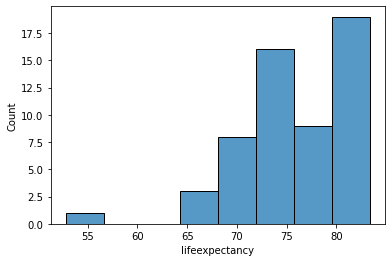

In [155]:
sns.histplot(data=df['lifeexpectancy']);

In [156]:
features = ['internetuserate','incomeperperson','oilperperson','relectricperperson','breastcancerper100th','polityscore']
X = hige_corrs[features]
y = hige_corrs['lifeexpectancy']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=4)
X_train.head()

,internetuserate,incomeperperson,oilperperson,relectricperperson,breastcancerper100th,polityscore
17,86.898845,27110.731590,1.938654,4036.953993,84.7,10.0
22,7.499996,786.700098,0.126979,110.705466,19.1,9.0
33,90.703555,26551.844240,2.997655,1490.056909,86.7,10.0
15,28.999477,1728.020976,0.732817,314.826200,23.5,5.0
29,82.515928,16372.499780,2.087848,1142.309009,20.4,8.0


In [157]:
pd.DataFrame(y_test.head())

,lifeexpectancy
4,70.739
20,79.915
54,78.531
24,72.974
12,73.703


#### Build the model

In [158]:
model = DecisionTreeRegressor(random_state=2)
model.fit(X_train, y_train)
def eval(x_test,y_test,model):
    pred = model.predict(x_test)
    print("Depth:",model.get_depth())
    print("MSE: {:.3f}".format(mean_squared_error(pred,y_test,squared=False)))
eval(X_test,y_test,model)

Depth: 11
MSE: 2.643


In [159]:
import sklearn.tree as tree
def plot_tree(tree_model,feat,size=(15,10)):
    fig = plt.figure(figsize=size)
    tree.plot_tree(tree_model, 
                   feature_names = feat, 
                   filled=True,
                  fontsize=15)  
    plt.show()

#### Improving the model with tree Pruning.

Depth: 2
MSE: 1.955


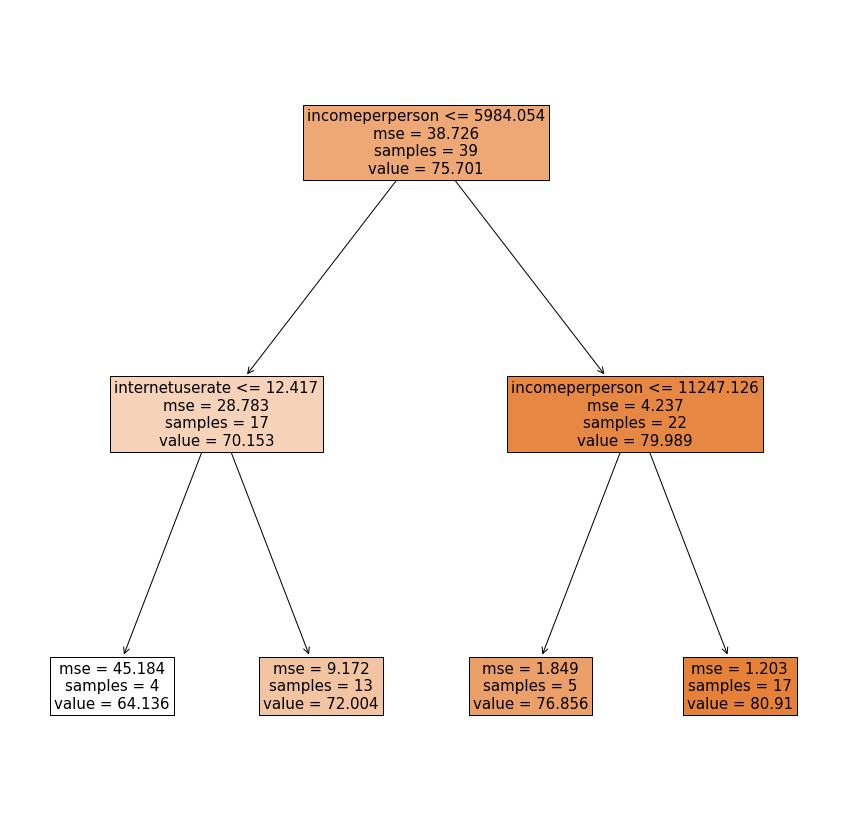

In [160]:
model = DecisionTreeRegressor(max_depth=2,random_state=6)
model.fit(X_train,y_train)

eval(X_test,y_test,model)
plot_tree(model,X_test.columns,size=(15,15))

### Obeservation: 
>
> It can be seen that it is possible to predict the lifeexpectancy.
>
> With a deviation of two years.
>
> It is interesting to see that the columns breastcancerper100th and polityscore Improve the model.
>